In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
%matplotlib inline
import IPython.core.display         
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
from scipy import stats
import csv
random.seed(100)
import warnings
warnings.filterwarnings('ignore')


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [0]:
sd1 = pd.read_csv('RocCurveData.csv')
sd1=sd1.iloc[:1817,:]
sd1

,Cancer,seekactual,EMC,CancerSEEK,A1DE,nb,svm,knn,j48,RF,dntb,Fuzzy,Adaboost,DEEPL,EMCfea,Unnamed: 15,Unnamed: 16,Unnamed: 17,EMCc,Seek,a1dec,nb.1,svm.1,knn.1,j48.1,RF.1,dntb.1,fuzzy,adaboost,DeepLearing,EMCpfea
0,0,1,0.000,0.159,0.000,0.000,0,0.0,0.000,0.00,0.000,0,0.024,0.136,0.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0.000,0.141,0.000,0.000,0,0.0,0.100,0.01,0.000,0,0.084,0.117,0.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0.000,0.158,0.000,0.000,0,0.0,0.042,0.02,0.000,0,0.024,0.214,0.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0.053,0.469,0.005,0.000,0,0.0,0.000,0.36,0.051,1,0.481,0.322,0.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0,1,0.540,0.428,0.606,0.000,0,1.0,0.211,0.68,0.770,1,0.830,0.380,0.0,NaN,NaN,NaN,1,1,1,0,0,1,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,1,0,0.969,0.898,0.996,0.035,1,1.0,1.000,0.97,0.992,1,0.711,0.788,1.0,NaN,NaN,NaN,1,0,1,0,1,1,1,1,1,1,1,1,1
1813,1,0,1.000,0.984,1.000,0.012,1,1.0,0.990,1.00,1.000,1,0.993,0.828,1.0,NaN,NaN,NaN,1,0,1,0,1,1,1,1,1,1,1,1,1
1814,1,0,0.998,0.953,1.000,1.000,1,1.0,1.000,0.96,0.999,1,0.961,0.952,1.0,NaN,NaN,NaN,1,0,1,1,1,1,1,1,1,1,1,1,1
1815,1,0,1.000,1.000,1.000,1.000,1,1.0,0.990,1.00,1.000,0,0.967,1.000,1.0,NaN,NaN,NaN,1,0,1,1,1,1,1,1,1,0,1,1,1


In [0]:
pc=sd1.iloc[:1817,2:15]
ay=sd1.iloc[:1817,0]
pc.head()
s=np.array(sd1)
pc

,EMC,CancerSEEK,A1DE,nb,svm,knn,j48,RF,dntb,Fuzzy,Adaboost,DEEPL,EMCfea
0,0.000,0.159,0.000,0.000,0,0.0,0.000,0.00,0.000,0,0.024,0.136,0.0
1,0.000,0.141,0.000,0.000,0,0.0,0.100,0.01,0.000,0,0.084,0.117,0.0
2,0.000,0.158,0.000,0.000,0,0.0,0.042,0.02,0.000,0,0.024,0.214,0.0
3,0.053,0.469,0.005,0.000,0,0.0,0.000,0.36,0.051,1,0.481,0.322,0.0
4,0.540,0.428,0.606,0.000,0,1.0,0.211,0.68,0.770,1,0.830,0.380,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,0.969,0.898,0.996,0.035,1,1.0,1.000,0.97,0.992,1,0.711,0.788,1.0
1813,1.000,0.984,1.000,0.012,1,1.0,0.990,1.00,1.000,1,0.993,0.828,1.0
1814,0.998,0.953,1.000,1.000,1,1.0,1.000,0.96,0.999,1,0.961,0.952,1.0
1815,1.000,1.000,1.000,1.000,1,1.0,0.990,1.00,1.000,0,0.967,1.000,1.0


In [0]:
pc=np.array(pc)
ay=np.array(ay)
n_model=pc.shape[1]
n_model

13

In [0]:
fpr = dict()
tpr = dict()
roc_auc = dict()
acc=dict()
for i in range(n_model):
  if i==1:
    acc[i]=metrics.accuracy_score(s[:,1], s[:,i+18])
  else:
    acc[i]=metrics.accuracy_score(s[:,0], s[:,i+18])
  fpr[i], tpr[i], _ = roc_curve(s[:,0], s[:,i+2])
  roc_auc[i] = auc(fpr[i], tpr[i])
  

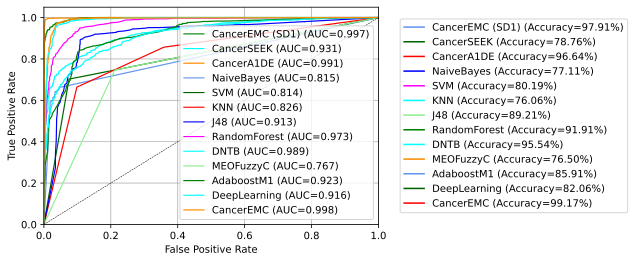

<Figure size 1440x1440 with 0 Axes>

In [0]:
# Plot all ROC curves
f=plt.figure()
colors = cycle(['green','aqua', 'darkorange', 'cornflowerblue','darkgreen','red','blue','magenta','cyan','lightgreen'])
models=['CancerEMC (SD1)','CancerSEEK','CancerA1DE','NaiveBayes','SVM','KNN','J48','RandomForest','DNTB','MEOFuzzyC','AdaboostM1','DeepLearning','CancerEMC']
p=[]
for i, color in zip(range(n_model), colors):
     plt.plot(fpr[i], tpr[i], color=color, lw=1.2, label=''+models[i]+' (AUC={0:0.3f})'.format(roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class\n\n')

l=plt.legend()
plt.grid()
#plt.style.use('classic')
for i, color in zip(range(n_model), colors):
     s=plt.plot([0],color=color, label=''+models[i]+' (Accuracy={0:0.2f}%)'.format(acc[i]*100))
     p.append(s[0])
plt.legend(handles=p,loc=6, bbox_to_anchor=(1.05, 0.5))
plt.gca().add_artist(l)
plt.figure(figsize=(20,20))
plt.show()
f.savefig("ROCBinary.pdf", bbox_inches='tight')
f.savefig("ROCBinary.png", bbox_inches='tight', dpi=2000)

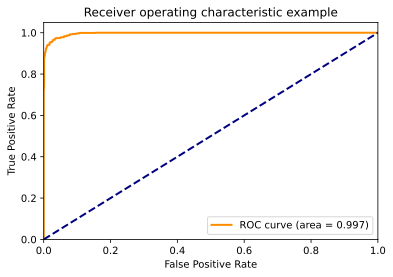

In [0]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

**ROC Curve for Cancer Type Before of SD4:**

In [0]:
sd2 = pd.read_csv('multi class.csv')
sd2=sd2.iloc[:,:]
sd2

,type,actual,prediction,weight,Breast,Colorectum,Upper GI,Liver,Lung,Ovary,Pancreas,no. of instance,a,p,e,pre
0,NOM:,4.0,4.0,1.0,0.408718,0.000093,0.000050,1.209951e-03,5.897936e-01,1.350000e-04,1.500000e-06,1,3:'Upper GI',2:Colorectum,+,0.610
1,NOM:,4.0,4.0,1.0,0.000107,0.189284,0.000002,7.530000e-04,8.098482e-01,3.050000e-06,2.540000e-06,2,3:'Upper GI',4:Liver,+,0.516
2,NOM:,4.0,4.0,1.0,0.011083,0.057062,0.000024,4.930000e-06,9.220904e-01,8.477131e-03,1.258694e-03,3,3:'Upper GI',2:Colorectum,+,0.478
3,NOM:,4.0,4.0,1.0,0.013706,0.012354,0.000007,1.480000e-07,9.711346e-01,2.275119e-03,5.230000e-04,4,3:'Upper GI',3:Upper GI,NaN,0.735
4,NOM:,4.0,4.0,1.0,0.282833,0.012404,0.000010,3.135451e-03,7.014698e-01,1.370000e-04,1.170000e-05,5,3:'Upper GI',3:Upper GI,NaN,0.710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,NOM:,3.0,4.0,1.0,0.004048,0.009674,0.000232,1.117923e-02,9.748240e-01,8.800000e-07,4.250000e-05,58,6:Ovary,6:Ovary,NaN,0.432
623,NOM:,3.0,3.0,1.0,0.001559,0.024810,0.111979,5.260247e-01,9.910000e-05,2.508808e-03,3.330185e-01,59,6:Ovary,6:Ovary,NaN,1.000
624,NOM:,3.0,4.0,1.0,0.000773,0.002746,0.322221,2.099035e-01,4.643253e-01,7.010000e-06,2.470000e-05,60,6:Ovary,6:Ovary,NaN,1.000
625,NOM:,3.0,3.0,1.0,0.000004,0.001753,0.154016,8.442266e-01,1.310000e-07,1.330000e-08,7.670000e-09,61,6:Ovary,6:Ovary,NaN,1.000


**ROC Curve for Cancer Type Before SMOTE:**

In [0]:
sd2 = pd.read_csv('19beforeSMOTE.csv')
sd2=sd2.iloc[:,:]
sd2

,type,actual,prediction,weight,Breast,Colorectum,Upper GI,Liver,Lung,Ovary,Pancreas
0,NOM:,4,0,1,0.725520,0.031281,0.002632,0.001060,0.238620,0.000872,0.000015
1,NOM:,4,4,1,0.003950,0.142262,0.000171,0.000879,0.852201,0.000288,0.000248
2,NOM:,4,4,1,0.049639,0.073576,0.000242,0.000265,0.869449,0.005135,0.001694
3,NOM:,4,4,1,0.071235,0.050578,0.001507,0.000112,0.873329,0.002351,0.000888
4,NOM:,4,1,1,0.350159,0.580823,0.001395,0.010122,0.052715,0.003947,0.000839
...,...,...,...,...,...,...,...,...,...,...,...
621,NOM:,6,6,1,0.110283,0.121674,0.001558,0.193566,0.005565,0.004682,0.562671
622,NOM:,3,4,1,0.003427,0.383161,0.001749,0.007036,0.602740,0.000045,0.001842
623,NOM:,3,3,1,0.008771,0.130484,0.321636,0.447696,0.000354,0.001162,0.089898
624,NOM:,3,3,1,0.000112,0.022869,0.271249,0.660891,0.044793,0.000044,0.000041


In [0]:
p=sd2.iloc[:,4:11]
y=sd2.iloc[:,1]
cp=sd2.iloc[:,2]
p.head()
s=np.array(sd2)

In [0]:
p=np.array(p)
y=np.array(y)
cp=np.array(cp)

In [0]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6])
n_classes = y.shape[1]

In [0]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], p[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


In [0]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), p.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [0]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

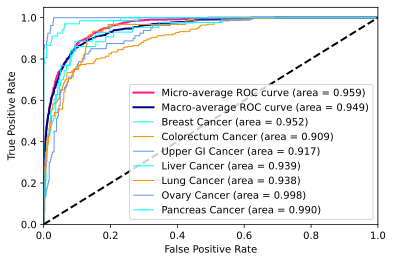

In [0]:
f=plt.figure()
cnam=['Breast','Colorectum','Upper GI','Liver','Lung','Ovary','Pancreas']
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (area = {0:0.3f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle='-', linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (area = {0:0.3f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle='-', linewidth=2)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
             label=''+cnam[i]+' Cancer (area = {0:0.3f})'
             ''.format(roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
f.savefig("19ROCBeforeSMOTE.pdf", bbox_inches='tight')
f.savefig("19ROCBeforeSMOTE.png", bbox_inches='tight', dpi=2000)

**ROC Curve for Cancer Types After SMOTE**

In [0]:
sd2 = pd.read_csv('19AfterSMOTE.csv')
sd2=sd2.iloc[:,:]
sd2

,type,actual,prediction,weight,Breast,Colorectum,Upper GI,Liver,Lung,Ovary,Pancreas
0,NOM:,2,2,1,7.150000e-07,4.210485e-03,9.919478e-01,3.840947e-03,2.340000e-08,2.330000e-09,3.570000e-09
1,NOM:,2,4,1,7.225008e-03,2.230000e-04,4.070000e-04,4.130000e-04,9.914310e-01,5.080000e-06,2.960000e-04
2,NOM:,2,2,1,1.346180e-03,6.279707e-02,9.321829e-01,3.429576e-03,2.440000e-04,1.230000e-07,4.840000e-07
3,NOM:,2,2,1,6.570000e-04,7.582363e-02,4.626222e-01,4.365026e-01,2.171999e-02,1.320000e-05,2.661158e-03
4,NOM:,2,2,1,5.280000e-04,3.674349e-03,9.813656e-01,1.360298e-02,8.270000e-04,2.430000e-08,1.970000e-06
...,...,...,...,...,...,...,...,...,...,...,...
1752,NOM:,6,6,1,2.130000e-07,6.330000e-08,1.580000e-09,4.770000e-09,8.400000e-09,2.390000e-09,9.999997e-01
1753,NOM:,6,6,1,9.910000e-06,3.170000e-06,5.820000e-07,8.750000e-07,4.150000e-06,3.350000e-09,9.999813e-01
1754,NOM:,6,6,1,1.120000e-06,2.280000e-08,5.890000e-10,2.060000e-09,4.700000e-10,5.570000e-10,9.999989e-01
1755,NOM:,6,6,1,4.960000e-07,2.330000e-06,2.430000e-07,2.690000e-07,6.020000e-08,3.490000e-08,9.999966e-01


In [0]:
p=sd2.iloc[:,4:11]
y=sd2.iloc[:,1]
cp=sd2.iloc[:,2]
p.head()
s=np.array(sd2)

In [0]:
cp

In [0]:
p=np.array(p)
y=np.array(y)
cp=np.array(cp)

In [0]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6])
n_classes = y.shape[1]

In [0]:
y.shape

(1757, 7)

In [0]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], p[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])



In [0]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), p.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [0]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

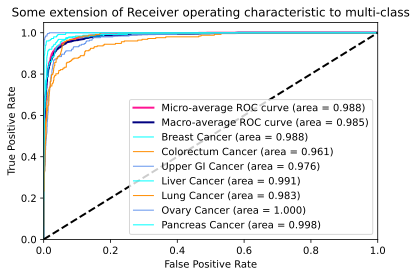

In [0]:
f=plt.figure()
cnam=['Breast','Colorectum','Upper GI','Liver','Lung','Ovary','Pancreas']
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (area = {0:0.3f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle='-', linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (area = {0:0.3f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle='-', linewidth=2)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
             label=''+cnam[i]+' Cancer (area = {0:0.3f})'
             ''.format(roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
f.savefig("19ROCAfterSMOTE.pdf", bbox_inches='tight')
f.savefig("19ROCAfterSMOTE.png", bbox_inches='tight', dpi=2000)

<Figure size 432x288 with 0 Axes>

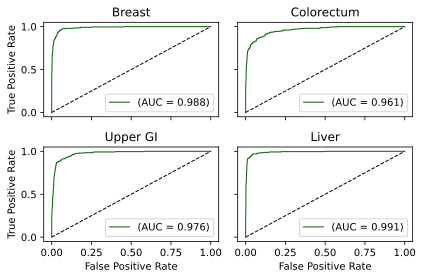

In [0]:
f1=plt.figure()
fig, axs = plt.subplots(2, 2)
cnam=['Breast','Colorectum','Upper GI','Liver','Lung','Ovary','Pancreas']
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

k=0
for m in range(2):
  for n in range(2):
    axs[m,n].plot(fpr[k], tpr[k], color='darkgreen', lw=1,
             label='(AUC = {0:0.3f})'
             ''.format(roc_auc[k]))
    axs[m,n].set_title(cnam[k])
    axs[m,n].legend(loc="lower right")
    axs[m,n].plot([0, 1], [0, 1], 'k--', lw=1)
    k=k+1

for ax in axs.flat:
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

for ax in axs.flat:
    ax.label_outer()
fig.tight_layout()

fig.savefig("AllClassAfterSMOTE1.pdf", bbox_inches='tight')
fig.savefig("AllClassAfterSMOTE1.png", bbox_inches='tight', dpi=2000)


<Figure size 432x288 with 0 Axes>

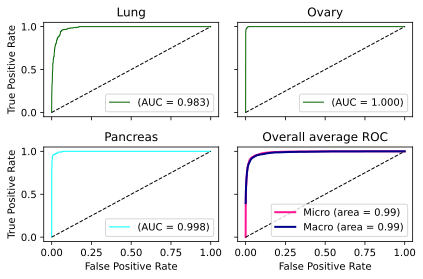

In [0]:

f=plt.figure()
fig, axs = plt.subplots(2, 2)



cnam=['Breast','Colorectum','Upper GI','Liver','Lung','Ovary','Pancreas']


colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

k=4
for m in range(2):
  for n in range(2):
    if k==6:
      break
    axs[m,n].plot(fpr[k], tpr[k], color='darkgreen', lw=1,
             label='(AUC = {0:0.3f})'
             ''.format(roc_auc[k]))
    axs[m,n].set_title(cnam[k])
    axs[m,n].legend(loc="lower right")
    axs[m,n].plot([0, 1], [0, 1], 'k--', lw=1)
    k=k+1
axs[1,0].plot(fpr[k], tpr[k], color=color, lw=1,
             label='(AUC = {0:0.3f})'
             ''.format(roc_auc[k]))
axs[1,0].set_title(cnam[k])
axs[1,0].legend(loc="lower right")
axs[1,0].plot([0, 1], [0, 1], 'k--', lw=1)


axs[1,1].plot(fpr["micro"], tpr["micro"],
         label='Micro (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle='-', linewidth=2)
axs[1,1].plot(fpr["macro"], tpr["macro"],
         label='Macro (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='darkblue', linestyle='-', linewidth=2)
axs[1,1].set_title('Overall average ROC')
axs[1,1].legend(loc="lower right")
axs[1,1].plot([0, 1], [0, 1], 'k--', lw=1)


for ax in axs.flat:
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

for ax in axs.flat:
    ax.label_outer()
fig.tight_layout()
fig.savefig("AllClassAfterSMOTE2.pdf", bbox_inches='tight')
fig.savefig("AllClassAfterSMOTE2.png", bbox_inches='tight', dpi=2000)

**Iris Data Example**

In [0]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [0]:
y.shape

In [0]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

In [0]:
y.shape

In [0]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [0]:
print(y_test[:, i])
#print(y_test)

In [0]:
print(y_score.shape)
print(y_score)

In [0]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [0]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [0]:
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

**Cancer Type Classification using SD4:**

In [0]:
sd2 = pd.read_csv('multi class.csv')
sd2=sd2.iloc[:626,:]
sd2

In [0]:
p=sd2.iloc[:,4:11]
y=sd2.iloc[:,1]
cp=sd2.iloc[:,2]
p.head()
s=np.array(sd2)

In [0]:
cp

In [0]:
p=np.array(p)
y=np.array(y)
cp=np.array(cp)

In [0]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6])
n_classes = y.shape[1]

In [0]:
y.shape

(626, 7)

In [0]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], p[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])



In [0]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), p.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [0]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

<Figure size 432x288 with 0 Axes>

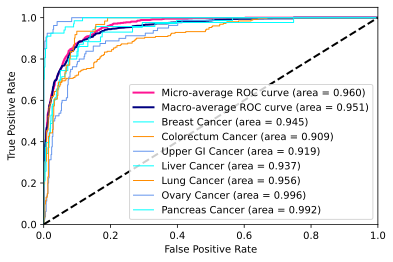

In [0]:
# Plot all ROC curves
cnam=['Breast','Colorectum','Upper GI','Liver','Lung','Ovary','Pancreas']
plt.figure()
f = plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (area = {0:0.3f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle='-', linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (area = {0:0.3f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle='-', linewidth=2)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
             label=''+cnam[i]+' Cancer (area = {0:0.3f})'
             ''.format(roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
#plt.savefig('ROCMC.png', dpi = 1200)
#f = plt.figure()
f.savefig("SD4ROCMC.pdf", bbox_inches='tight')
f.savefig("SD4ROCMC.png", bbox_inches='tight', dpi=1600)

**Cluster Corretional Heatmap of Binary Class:**

In [0]:
 
# Data set
df = pd.read_csv('SD1.csv')
df=df.iloc[:1817,:11]
df


In [0]:
# cluster map (dendogram and tree)
#iris = sns.load_dataset("iris")
plt.figure()
f=plt.figure()
df = pd.read_csv('SD1.csv')
df=df.iloc[:1817,:10]
df1 = df.Class
df['Classification_type']=df1
#df=df.set_index('Classification_type')
print(df)
#df = iris.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
d=df.iloc[:1817,0:9]

#print(df1)

#d=d.set_index('Class')
x = dict(zip(df1.unique(),"rgb"));
print(x)
row_colors = df1.map(x)
print(row_colors)
cg = sns.clustermap(d,row_colors=row_colors,figsize=(12, 12),metric="correlation")
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(),rotation = 0,size =8)
plt.savefig("ClHMSD1.pdf", bbox_inches='tight')
plt.savefig("ClHMSD1.png", bbox_inches='tight', dpi=1600)

In [0]:
df = pd.read_csv('SD4.csv')
df=df.iloc[:,:42]
df

In [0]:
plt.figure()
#df = iris.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
d=df.iloc[:,0:42]
df1 = d['Tumor type']
#print(df1)
d = d.drop(columns="Sex")
#d = d.set_index('Tumor type')
f=plt.figure()
x = dict(zip(df1.unique(),"rgb"))
row_colors = df1.map(x)
d=d.iloc[:,0:40]
cg = sns.clustermap(d,row_colors=row_colors,figsize=(12, 12),metric="correlation")
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(),rotation = 0,size =8)
plt.savefig("CHPSD4.pdf", bbox_inches='tight')
plt.savefig("CHPSD4.png", bbox_inches='tight', dpi=1600)

In [0]:
df = pd.read_csv('SD4.csv')
df=df.iloc[:,:42]
df

In [0]:
# Libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
plt.figure()
df = pd.read_csv('SD4.csv')
df=df.iloc[:,:42]
df
df = df.set_index('Tumor type')
#del df.index.Sex
df=df.iloc[:,:40]
# OK now we can compare our individuals. But how do you determine the similarity between 2 cars?
# Several way to calculate that. the 2 most common ways are: correlation and euclidean distance?
sns.clustermap(df, metric="correlation", standard_scale=1, cmap="Greens")
#sns.clustermap(df, metric="euclidean", standard_scale=1)
plt.savefig("CHPSD41.pdf", bbox_inches='tight')
plt.savefig("CHPSD41.png", bbox_inches='tight', dpi=1600)

In [0]:
# Libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
 
# Data set
url = 'https://python-graph-gallery.com/wp-content/uploads/mtcars.csv'
df = pd.read_csv(url)
df = df.set_index('model')
del df.index.name
df=df.iloc[:,1:]
# Default plot
sns.clustermap(df)
df

In [0]:
# Libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
 
# Data set
url = 'https://python-graph-gallery.com/wp-content/uploads/mtcars.csv'
df = pd.read_csv(url)
df = df.set_index('model')
#del df.index.name
 
# CHange color palette
sns.clustermap(df, metric="euclidean", standard_scale=1, method="ward", cmap="mako")
#sns.clustermap(df, metric="euclidean", standard_scale=1, method="ward", cmap="viridis")
#sns.clustermap(df, metric="euclidean", standard_scale=1, method="ward", cmap="Blues")
#print(df.index.name)

In [0]:
# Libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
 
# Data set
url = 'https://python-graph-gallery.com/wp-content/uploads/mtcars.csv'
df = pd.read_csv(url)
df = df.set_index('model')
del df.index.name
 
 
# OK now we can compare our individuals. But how do you determine the similarity between 2 cars?
# Several way to calculate that. the 2 most common ways are: correlation and euclidean distance?
sns.clustermap(df, metric="correlation", standard_scale=1)
sns.clustermap(df, metric="euclidean", standard_scale=1)

In [0]:
# Libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
 
# Data set
url = 'https://python-graph-gallery.com/wp-content/uploads/mtcars.csv'
df = pd.read_csv(url)
df = df.set_index('model')
del df.index.name
df
 
# Standardize or Normalize every column in the figure
# Standardize:
sns.clustermap(df, standard_scale=1)
# Normalize
sns.clustermap(df, z_score=1)

In [0]:
# Libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
 
# Data set
url = 'https://python-graph-gallery.com/wp-content/uploads/mtcars.csv'
df = pd.read_csv(url)
df = df.set_index('model')
del df.index.name
df
 
# OK now we determined the distance between 2 individuals. But how to do the clusterisation? Several methods exist.
# If you have no idea, ward is probably a good start.
sns.clustermap(df, metric="euclidean", standard_scale=1, method="single")
sns.clustermap(df, metric="euclidean", standard_scale=1, method="ward")

In [0]:
# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('iris')
 
# with regression
sns.pairplot(df, kind="reg")
plt.show()
 
# without regression
sns.pairplot(df, kind="scatter")
plt.show()

In [0]:
# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('iris')
 
# left
sns.pairplot(df, kind="scatter", hue="species", markers=["o", "s", "D"], palette="Set2")
plt.show()
 
# right: you can give other arguments with plot_kws.
sns.pairplot(df, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [0]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# I build a data set: 10 individuals and 5 variables for each
ind1=[5,10,3,4,8,10,12,1,9,4]
ind5=[1,1,13,4,18,5,2,11,3,8]
df = pd.DataFrame({ 'A':ind1, 'B':ind1 + np.random.randint(10, size=(10)) , 'C':ind1 + np.random.randint(10, size=(10)) , 'D':ind1 + np.random.randint(5, size=(10)) , 'E':ind1 + np.random.randint(5, size=(10)), 'F':ind5, 'G':ind5 + np.random.randint(5, size=(10)) , 'H':ind5 + np.random.randint(5, size=(10)), 'I':ind5 + np.random.randint(5, size=(10)), 'J':ind5 + np.random.randint(5, size=(10))})
df
 
# Calculate the correlation between individuals. We have to transpose first, because the corr function calculate the pairwise correlations between columns.
corr = df.corr()
corr
 
# Transform it in a links data frame (3 columns only):
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links
 
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] > 0.8) & (links['var1'] != links['var2']) ]
links_filtered
 
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
# Plot the network:
nx.draw(G, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)


In [0]:
# library & dataset
import seaborn as sns, numpy as np
df = sns.load_dataset("iris")
 
# Basic violinplot
for 
ax = sns.violinplot(x="species", y="petal_length", data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['species'])['sepal_length'].median().values
nobs = df['species'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
   ax.text(pos[tick], medians[tick] + 0.03, nobs[tick], horizontalalignment='center', size='x-small', color='w', weight='semibold')
 
#sns.plt.show()
df

In [0]:
import seaborn as sns # for data visualization
flight = sns.load_dataset('flights') # load flights datset from GitHub seaborn repository

# reshape flights dataeset in proper format to create seaborn heatmap
flights_df = flight.pivot('month', 'year', 'passengers') 

sns.heatmap(flights_df)# create seaborn heatmap


In [0]:
flight

In [0]:
flights_df

In [0]:
import seaborn as sns # for data visualization
#flight = sns.load_dataset('flights') # load flights datset from GitHub seaborn repository
df = pd.read_csv('Cancer dataset with 9.csv')
df=df.iloc[:,:10]
# reshape flights dataeset in proper format to create seaborn heatmap
flights_df = df.pivot('Class', 'OmegaScore', 'CA19-9 (U/ml)') 

sns.heatmap(flights_df)# create seaborn heatmap
df

In [0]:
# cluster map (dendogram and tree)
#iris = sns.load_dataset("iris")
df = pd.read_csv('Cancer dataset with 9.csv')
df=df.iloc[:,:10]
#df = iris.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
d=df.iloc[:,0:9]
df1 = df.Class
x = dict(zip(df1.unique(),"rgb"))
row_colors = df1.map(x)
cg = sns.clustermap(d,row_colors=row_colors,figsize=(12, 12),metric="correlation")
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(),rotation = 0,size =8)
plt.show()

In [0]:
df = pd.read_csv('SD4.csv')
df=df.iloc[:,:42]
df

In [0]:
#Using Pearson Correlation

plt.figure(figsize=(12,10))
cor = df.corr()
#cmap=plt.cm.Reds
sns.heatmap(cor, annot=False, cmap='BrBG')
plt.show()

In [0]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#dataframe = read_csv(url, names=names)
array = df.values
X = array[:,0:40]
Y = array[:,41]
# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)



In [0]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
a=model.feature_importances_

In [0]:
a.hist()

In [0]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
#print(features)

In [0]:
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)

In [0]:
pip install sklearn

In [0]:
import pandas as pd
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
data=df
#data=np.array(df)

In [0]:
x=data.iloc[:1200,:40]
x
y=data.iloc[:1200,41]
tx=data.iloc[1201:,:40]
ty=data.iloc[1201:,41]

In [0]:
X_train,y_train,X_test,y_test = train_test_split(data,test_size=0.2)

In [0]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x, y)

In [0]:
sel.get_support()
selected_feat= x.columns[(sel.get_support())]
len(selected_feat)

In [0]:
print(selected_feat)

In [0]:
s=pd.series(sel.estimator_,feature_importances_.ravel()).hist()

In [0]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso#Loading the dataset


In [0]:
x = load_boston()
df = pd.DataFrame(x.data, columns = x.feature_names)
df["MEDV"] = x.target
X = df.drop("MEDV",1)   #Feature Matrix
y = df["MEDV"]          #Target Variable
df.head()

In [0]:
d=df
x=d.iloc[:,:9]
y=d.iloc[:,9]
print(x)
x=np.array(x)
y=np.array(y)

In [0]:
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

In [0]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [0]:
df = pd.read_csv('Cancer.csv')
#df=df.iloc[:,2:44]
df

In [0]:
x=df.iloc[0:1817,3:]
y=df.iloc[0:1817,0]
x

In [0]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x, y)

pd.Series(clf.feature_importances_, index=df.columns[1:]).plot.bar(color='steelblue', figsize=(12, 6))

In [0]:
import numpy as np
import scipy.stats as stats


In [0]:
x=np.array(x)

In [0]:
u_statistic, pVal = stats.mannwhitneyu(x[1],x[2])
pVal

In [0]:
d = pd.read_csv('SD1.csv')
d=d.iloc[:1817,:13]
d

In [0]:
# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns
#df = sns.load_dataset('iris')
#plt.figure()
sns.pairplot(d, kind="scatter", hue="Class", markers=["o", "s"], palette="Set2")
plt.savefig("S2.pdf", bbox_inches='tight')
plt.savefig("S2.png", bbox_inches='tight', dpi=2000)


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f6b012cdd90> (for post_execute):


KeyboardInterrupt: ignored

In [0]:
d = pd.read_csv('SD4.csv')
d=d.iloc[:,:42]
d

,OmegaScore,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),DKK1 (ng/ml),Endoglin (pg/ml),FGF2 (pg/ml),Follistatin (pg/ml),Galectin-3 (ng/ml),G-CSF (pg/ml),GDF15 (ng/ml),HE4 (pg/ml),HGF (pg/ml),IL-6 (pg/ml),IL-8 (pg/ml),Kallikrein-6 (pg/ml),Leptin (pg/ml),Mesothelin (ng/ml),Midkine (pg/ml),Myeloperoxidase (ng/ml),NSE (ng/ml),OPG (ng/ml),OPN (pg/ml),PAR (pg/ml),Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),Sex,Tumor type
0,0.86,781.392,3801.92,2406.08,64.310,18.70,24.290,16.64,2390.97,6202.710,0.84,1034.92,143.400,1237.52,6.11,50.230,0.75,3743.160,158.340,3.036,32.690,5019.24,96112.28,14.03,385.64,8.30,12.20,0.47,42931.54,10005.05,61562.84,2519.78,202.158,58.39,7111.76,6279.29,16.104,2229.275,87948.95,65372.89,Female,Breast
1,0.39,781.392,3003.83,2890.74,4.770,5.61,15.798,20.16,1271.43,6202.710,1.08,2228.72,83.840,1112.10,2.86,31.440,0.82,3743.160,158.334,3.036,27.762,5347.23,24860.31,12.62,234.71,11.92,9.83,0.75,72929.70,8114.77,113474.51,1586.79,202.158,183.95,8477.96,5133.74,16.104,2229.275,66506.63,58639.44,Female,Breast
2,0.98,5870.640,1204.30,1704.54,10.970,20.18,22.690,16.16,1235.59,1918.914,1.02,2353.93,129.610,678.86,9.13,111.900,0.20,3835.158,379.190,4.080,11.670,7479.37,15997.47,20.42,1087.03,251.35,95.34,0.58,67901.16,1420.03,11701.29,426.83,1998.710,90.01,4854.77,6754.36,16.152,2020.510,61463.72,41502.75,Female,Breast
3,1.31,1752.170,1491.48,1012.87,6.680,7.44,16.134,15.13,465.30,2087.710,0.90,1019.30,183.890,831.88,6.76,111.900,0.35,3835.158,1048.550,20.390,8.160,4721.27,96591.86,16.93,4740.93,49.30,21.01,0.17,103022.16,1684.45,15233.98,627.67,1823.730,68.03,3468.72,4652.09,16.152,2020.510,31681.29,29890.83,Female,Breast
4,1.03,959.916,3285.53,877.09,4.896,6.19,17.010,22.86,1432.20,2413.210,0.95,1931.89,158.790,2515.41,8.31,654.840,0.31,3835.158,353.810,11.120,8.460,3585.36,21289.59,16.69,376.27,40.87,55.29,0.13,151104.83,1908.44,12424.87,2617.80,1162.730,81.82,5576.42,6832.34,16.152,4584.260,31278.71,27219.12,Female,Breast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,1.79,1956.220,4296.56,517.31,11.590,29.98,19.010,13.86,900.50,3442.000,1.06,1819.95,262.260,1175.44,7.38,112.410,1.15,7314.950,449.350,20.800,12.150,6454.30,84970.20,24.13,320.81,20.47,8.61,0.81,110423.32,6054.14,16994.48,1089.80,1796.050,23.97,6479.01,9657.93,16.542,5661.300,76837.22,49194.90,Male,Upper GI
622,1.10,5393.210,1775.05,1817.67,5.770,16.08,16.692,18.46,2552.40,1955.244,0.86,2115.52,152.800,746.99,8.94,123.260,2.06,4324.740,216.750,15.528,10.510,11203.71,17618.21,26.77,634.68,5.08,5.71,0.47,48657.66,4373.46,203448.56,2103.87,1638.090,28.98,6902.77,9002.44,16.542,1774.615,61544.54,44563.80,Male,Upper GI
623,0.73,959.916,2161.28,1410.31,6.680,19.42,534.150,9.49,1093.75,2725.410,0.92,468.78,206.360,1539.19,8.06,249.530,0.35,3835.158,340.830,5.300,30.790,1956.47,3151.20,16.15,633.67,23.37,8.63,0.30,62764.25,7366.19,10878.88,985.27,1267.240,139.63,2580.30,3757.01,16.152,2020.510,56037.14,30929.41,Male,Upper GI
624,1.98,7963.520,1831.74,3280.95,4.896,7.70,16.134,21.59,2281.50,3027.000,0.64,1967.42,81.102,678.86,5.38,111.900,0.47,3835.158,159.876,4.080,8.160,3703.77,171646.44,28.09,1123.75,6.50,7.51,0.24,137674.76,1840.92,18962.30,1728.14,2349.710,41.54,2859.37,3336.47,16.152,2020.510,39438.69,33947.65,Female,Upper GI


In [0]:
# library & dataset

import matplotlib.pyplot as plt
import seaborn as sns
#plt.figure()

#sns.pairplot(d, kind="scatter", hue='Tumor type', palette="Set2")
#plt.show()
 
# right: you can give other arguments with plot_kws.
sns.pairplot(d, kind="scatter", hue="Tumor type", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
#plt.show()
plt.savefig("LocalizationDataRepresentation.pdf", bbox_inches='tight')
plt.savefig("LocalizationDataRepresentation.png", bbox_inches='tight', dpi=2000)

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f6b012cdd90> (for post_execute):


KeyboardInterrupt: ignored

In [0]:
sd2 = pd.read_csv('SD2.csv')
sd2=sd2.iloc[:1817,2:]
sd2

,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),DKK1 (ng/ml),Endoglin (pg/ml),FGF2 (pg/ml),Follistatin (pg/ml),Galectin-3 (ng/ml),G-CSF (pg/ml),GDF15 (ng/ml),HE4 (pg/ml),HGF (pg/ml),IL-6 (pg/ml),IL-8 (pg/ml),Kallikrein-6 (pg/ml),Leptin (pg/ml),Mesothelin (ng/ml),Midkine (pg/ml),Myeloperoxidase (ng/ml),NSE (ng/ml),OPG (ng/ml),OPN (pg/ml),PAR (pg/ml),Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),Omega Score,Sex,Tumor type,AJCC Stage,Class
0,1583.450,5598.50,3621.04,5.090,19.08,16.452,9.81,540.10,1938.654,0.78,2882.65,92.02,2144.33,11.19,131.460,0.53,3857.712,377.26,11.316,8.238,5938.28,75826.61,14.29,315.23,14.22,12.04,0.47,56516.58,8852.96,11606.60,3284.17,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82,2.96,Male,Colorectum,I,Cancer
1,715.308,20936.35,2772.96,7.270,10.04,40.910,27.57,5902.40,1938.654,0.77,3921.77,164.06,1646.26,9.90,131.460,2.39,5779.110,659.68,21.280,29.820,3409.18,211751.33,32.57,260.56,23.88,23.25,0.34,61001.39,20782.58,14374.99,1911.81,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09,2.45,Female,Colorectum,I,Cancer
2,4365.530,2350.93,4120.77,4.854,16.96,16.452,14.59,973.80,1976.940,0.90,2410.16,154.77,2486.88,11.61,131.460,0.50,3857.712,329.07,11.316,35.060,3338.60,2683.07,15.09,491.81,12.02,12.84,0.37,88896.24,7534.43,38375.00,1743.94,204.792,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60,1.22,Female,Colorectum,II,Cancer
3,715.308,1604.34,2029.96,5.390,8.31,16.452,7.78,2027.50,1938.654,0.64,1284.96,227.57,829.43,4.80,152.240,0.19,7819.170,266.66,15.300,15.890,3162.89,41859.78,16.52,230.45,6.49,22.79,0.29,42549.61,4722.42,12072.51,1059.24,204.792,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73,1.64,Female,Colorectum,II,Cancer
4,801.300,2087.57,2069.17,4.854,11.73,16.452,12.21,614.50,1938.654,0.78,2552.72,134.72,2168.23,8.92,131.460,0.30,3857.712,370.88,11.316,8.238,4442.46,100119.47,8.81,238.47,13.33,27.20,0.29,24274.11,6945.90,23718.17,1736.92,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20,1.33,Female,Colorectum,II,Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,879.498,1484.70,2096.76,24.820,10.30,42.390,14.92,914.00,1970.916,3.05,1113.68,221.80,875.57,8.51,133.080,0.41,4113.462,284.34,10.500,12.830,5376.57,66095.36,17.71,679.06,30.18,9.72,0.46,38603.84,16717.38,58266.97,2542.26,207.240,115.24,5390.31,8538.58,16.890,599.40,167799.61,50128.60,0.98,Female,Ovary,I,Cancer
1813,1337.330,1607.90,852.37,5.580,9.80,16.440,12.32,1179.50,1970.916,1.74,1702.42,234.20,573.21,19.76,32.802,0.34,4113.462,374.03,10.500,8.274,6774.89,75175.83,21.95,524.17,39.62,79.03,0.44,29994.01,2656.02,187828.79,1670.22,207.240,147.17,7951.03,12966.19,16.890,599.40,123443.76,54066.98,3.92,Female,Ovary,I,Cancer
1814,879.498,1592.84,1044.45,30.480,8.48,16.440,8.26,443.01,3590.000,0.73,499.81,91.06,650.95,8.67,32.802,0.86,48893.330,309.22,10.500,11.160,7294.52,10713.71,37.91,467.40,11.93,4.30,0.29,93601.15,7127.74,241440.02,1194.03,207.240,104.63,2396.36,1901.41,16.890,599.40,104070.89,39844.02,7.96,Female,Ovary,III,Cancer
1815,879.498,5267.95,1445.69,1469.450,23.74,62.260,16.53,443.01,50659.050,1.24,2219.60,143.09,1033.29,6.69,104.000,0.69,16014.510,1153.70,20.330,20.540,6212.68,6468.71,8.26,916.60,64.83,19.52,0.52,145116.62,8954.41,140145.70,1607.16,207.240,73.55,3079.81,5312.90,16.890,6864.33,110579.24,42921.13,0.81,Female,Ovary,II,Cancer


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
#df = sns.load_dataset('iris')
#plt.figure()
sns.pairplot(sd2, kind="scatter", hue="Class", markers=["o", "s"], palette="Set2")
plt.savefig("S1.pdf", bbox_inches='tight')
plt.savefig("S1.png", bbox_inches='tight')


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f6b012cdd90> (for post_execute):


KeyboardInterrupt: ignored

In [0]:
# Libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
plt.figure()
df = pd.read_csv('SD4.csv')
df=df.iloc[:,:42]
df
df = df.set_index('Tumor type')
#del df.index.Sex
df=df.iloc[:,:40]
# OK now we can compare our individuals. But how do you determine the similarity between 2 cars?
# Several way to calculate that. the 2 most common ways are: correlation and euclidean distance?
sns.clustermap(df, metric="correlation", standard_scale=1, cmap="Greens")
#sns.clustermap(df, metric="euclidean", standard_scale=1)
plt.savefig("CHPSD41.pdf", bbox_inches='tight')
plt.savefig("CHPSD41.png", bbox_inches='tight', dpi=1600)

In [0]:
df = pd.read_csv('SD1.csv')
df=df.iloc[:1817,:42]
df

,OmegaScore,'CA-125 (U/ml)','CEA (pg/ml)','CA19-9 (U/ml)','Prolactin (pg/ml)','HGF (pg/ml)','OPN (pg/ml)','Myeloperoxidase (ng/ml)','TIMP-1 (pg/ml)',Age,Sex,Race,Class
0,2.96,5.09,540.1,16.452,11606.6,377.26,56516.58,14.22,56428.71,60,Male,Caucasian,Cancer
1,2.45,7.27,5902.4,40.91,14374.99,659.68,61001.39,23.88,73940.49,59,Female,Caucasian,Cancer
2,1.22,4.854,973.8,16.452,38375,329.07,88896.24,12.02,22797.28,69,Female,Caucasian,Cancer
3,1.64,5.39,2027.5,16.452,12072.51,266.66,42549.61,6.49,20441.19,70,Female,Caucasian,Cancer
4,1.33,4.854,614.5,16.452,23718.17,370.88,24274.11,13.33,56288.51,43,Female,Caucasian,Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,0.98,24.82,914,42.39,58266.97,284.34,38603.84,30.18,167799.61,55,Female,Caucasian,Cancer
1813,3.92,5.58,1179.5,16.44,187828.79,374.03,29994.01,39.62,123443.76,57,Female,Caucasian,Cancer
1814,7.96,30.48,443.01,16.44,241440.02,309.22,93601.15,11.93,104070.89,60,Female,Caucasian,Cancer
1815,0.81,1469.45,443.01,62.26,140145.7,1153.7,145116.62,64.83,110579.24,49,Female,Caucasian,Cancer


In [0]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
plt.figure()
df = pd.read_csv('SD4.csv')
df=df.iloc[:1817,:]
df
df = df.set_index('Class')
#del df.index.Sex
df=df.iloc[:1817,:40]
print(df)
# OK now we can compare our individuals. But how do you determine the similarity between 2 cars?
# Several way to calculate that. the 2 most common ways are: correlation and euclidean distance?
sns.pairplot(sd2, kind="scatter", hue="Class", markers=["o", "s"], palette="Set2")
#sns.clustermap(df, metric="euclidean", standard_scale=1)
plt.savefig("CHPSD9.pdf", bbox_inches='tight')
plt.savefig("CHPSD9.png", bbox_inches='tight', dpi=1600)

In [0]:
df = pd.read_csv('SD2.csv')
df=df.iloc[0:1817,2:46]
print(df)

      AFP (pg/ml)  Angiopoietin-2 (pg/ml)  ...  AJCC Stage   Class
0        1583.450                 5598.50  ...           I  Cancer
1         715.308                20936.35  ...           I  Cancer
2        4365.530                 2350.93  ...          II  Cancer
3         715.308                 1604.34  ...          II  Cancer
4         801.300                 2087.57  ...          II  Cancer
...           ...                     ...  ...         ...     ...
1812      879.498                 1484.70  ...           I  Cancer
1813     1337.330                 1607.90  ...           I  Cancer
1814      879.498                 1592.84  ...         III  Cancer
1815      879.498                 5267.95  ...          II  Cancer
1816      879.498                 3546.43  ...         III  Cancer

[1817 rows x 44 columns]


In [0]:
# Libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
plt.figure()
df = pd.read_csv('SD2.csv')
df=df.iloc[0:1817,2:46]
print(df)
sns.pairplot(df, kind="scatter", hue="Class", markers=["o", "s"], palette="Set2")
#sns.clustermap(df, metric="correlation", standard_scale=1, cmap="Greens")
#sns.clustermap(df, metric="euclidean", standard_scale=1)
#plt.savefig("scatter.pdf", bbox_inches='tight')
plt.savefig("scatter.jpg", bbox_inches='tight')

      AFP (pg/ml)  Angiopoietin-2 (pg/ml)  ...  AJCC Stage   Class
0        1583.450                 5598.50  ...           I  Cancer
1         715.308                20936.35  ...           I  Cancer
2        4365.530                 2350.93  ...          II  Cancer
3         715.308                 1604.34  ...          II  Cancer
4         801.300                 2087.57  ...          II  Cancer
...           ...                     ...  ...         ...     ...
1812      879.498                 1484.70  ...           I  Cancer
1813     1337.330                 1607.90  ...           I  Cancer
1814      879.498                 1592.84  ...         III  Cancer
1815      879.498                 5267.95  ...          II  Cancer
1816      879.498                 3546.43  ...         III  Cancer

[1817 rows x 44 columns]


<Figure size 432x288 with 0 Axes>

# **Protein Biomakers Selection:**

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from operator import itemgetter 

df = pd.read_csv('PBM.csv')
df=df.iloc[0:1817,:]
#print(df)
x=df.iloc[0:1817,:39]
x
z=df.iloc[0:1817,:39]
f=list(x.columns) 
y=df.iloc[0:1817,39]
y
y=np.array(y)
x=np.array(x)
#np.nan_to_num(x)

In [0]:
a=np.where(np.isnan(x))
print(a[0])

[]


In [0]:
for i in range(68):
  x[a[0][i]][a[1][i]]=0.0

In [0]:
a=np.where(np.isnan(x))
print(a[1])

[]


In [0]:
trx=x[:1200,:]
triy=y[:1200]
tx=x[1201:,:]
ty=y[1201:]

In [0]:
a=np.where(np.isnan(x))
print(a[1])

[]


0.13089027356144137
Thrombospondin-2 (pg/ml)
['IL-8 (pg/ml)', 'IL-6 (pg/ml)', 'OPN (pg/ml)', 'Prolactin (pg/ml)', 'CYFRA 21-1 (pg/ml)', 'GDF15 (ng/ml)', 'TGFa (pg/ml)', 'HGF (pg/ml)', 'CA19-9 (U/ml)', 'CA-125 (U/ml)', 'HE4 (pg/ml)', 'NSE (ng/ml)', 'sFas (pg/ml)', 'sEGFR (pg/ml)', 'Thrombospondin-2 (pg/ml)', 'Myeloperoxidase (ng/ml)', 'G-CSF (pg/ml)', 'DKK1 (ng/ml)', 'TIMP-1 (pg/ml)', 'CEA (pg/ml)', 'AFP (pg/ml)', 'Midkine (pg/ml)', 'OPG (ng/ml)', 'CD44 (ng/ml)', 'sHER2/sEGFR2/sErbB2 (pg/ml)', 'FGF2 (pg/ml)', 'TIMP-2 (pg/ml)', 'Galectin-3 (ng/ml)', 'Kallikrein-6 (pg/ml)', 'Mesothelin (ng/ml)', 'Follistatin (pg/ml)', 'Angiopoietin-2 (pg/ml)', 'sPECAM-1 (pg/ml)', 'PAR (pg/ml)', 'SHBG (nM)', 'Leptin (pg/ml)', 'AXL (pg/ml)', 'CA 15-3 (U/ml)', 'Endoglin (pg/ml)']


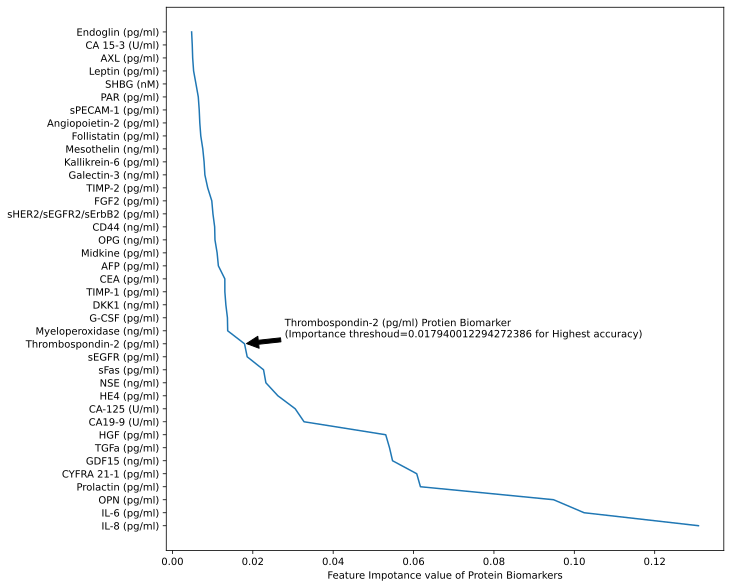

In [0]:
rfc = RandomForestClassifier(random_state = 0, n_jobs = -1)
 
# Fitting the classifier
rfc.fit(x, y)
l=[]
# Printing the name of each feature along with the gini value
for feature in zip(f, rfc.feature_importances_):
    l.append(feature)
res = sorted(l, key = itemgetter(1),reverse = True)
n=[]
m=[]
for i in res:
  m.append(i[0])
  n.append(i[1])
print(res[0][1])
plt.figure(figsize=(10,10))
#plt.hist(n, bins=39)
yv = m[14]
print(yv)
xpos = np.where(m == yv)
print(m)
xv = n[14]
s=str(yv)+" Protien Biomarker \n(Importance threshoud="+str(xv)+' for Highest accuracy)'
plt.plot(n,m)
plt.annotate(s, xy=(xv, 14), xytext=(xv+0.01, 14+0.5),arrowprops=dict(facecolor='black', shrink=0.05),)
plt.xlabel('Feature Impotance value of Protein Biomarkers')
plt.savefig("Rffeature.pdf", bbox_inches='tight')
plt.savefig("Rffeature.png", bbox_inches='tight', dpi=600)
plt.show()

In [0]:
from sklearn.feature_selection import RFE
# Finally selecting the most important features
sfm = SelectFromModel(rfc, threshold=0.015)
sfm.fit(x, y)
#rfc.fit(trx,triy)
# Printing the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(f[feature_list_index])

CA-125 (U/ml)
CA19-9 (U/ml)
CYFRA 21-1 (pg/ml)
GDF15 (ng/ml)
HE4 (pg/ml)
HGF (pg/ml)
IL-6 (pg/ml)
IL-8 (pg/ml)
NSE (ng/ml)
OPN (pg/ml)
Prolactin (pg/ml)
sEGFR (pg/ml)
sFas (pg/ml)
TGFa (pg/ml)
Thrombospondin-2 (pg/ml)


In [0]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x, y)
sfm = SelectFromModel(etc, threshold=0.02)
sfm.fit(x, y)
for feature_list_index in sfm.get_support(indices=True):
    print(f[feature_list_index])
    

CEA (pg/ml)
CYFRA 21-1 (pg/ml)
DKK1 (ng/ml)
GDF15 (ng/ml)
HE4 (pg/ml)
HGF (pg/ml)
IL-6 (pg/ml)
IL-8 (pg/ml)
Midkine (pg/ml)
Myeloperoxidase (ng/ml)
NSE (ng/ml)
OPG (ng/ml)
OPN (pg/ml)
Prolactin (pg/ml)
sEGFR (pg/ml)
sFas (pg/ml)
TIMP-1 (pg/ml)


In [0]:
# Importing the required packages
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
 
# Creating a logistic model object
model = LogisticRegression()
#model =RandomForestClassifier()
# Identifying top 2 variables our of 4
for i in range(2,38):
   rfe_model = RFE(model, i)
   rfe_fit = rfe_model.fit(trx, triy)
   p=rfe_model.predict(tx)
   acc=metrics.accuracy_score(p,ty)
   print(i,':')
   print(' =',acc)


2 :
 = 0.18019480519480519
3 :
 = 0.18019480519480519
4 :
 = 0.22077922077922077
5 :
 = 0.30844155844155846
6 :
 = 0.28733766233766234


KeyboardInterrupt: ignored

In [0]:
model = LogisticRegression()

rfe_model = RFE(model, 25)
rfe_fit = rfe_model.fit(x, y)
p=rfe_model.predict(x)
acc=metrics.accuracy_score(p,y)
# Print the names of the most important features
for feature_list_index in rfe_fit.get_support(indices=True):
    print(f[feature_list_index])
print('accuray=',acc)

CA-125 (U/ml)
CA19-9 (U/ml)
CEA (pg/ml)
CYFRA 21-1 (pg/ml)
Endoglin (pg/ml)
FGF2 (pg/ml)
G-CSF (pg/ml)
HE4 (pg/ml)
HGF (pg/ml)
IL-6 (pg/ml)
IL-8 (pg/ml)
Kallikrein-6 (pg/ml)
Midkine (pg/ml)
Myeloperoxidase (ng/ml)
NSE (ng/ml)
OPN (pg/ml)
PAR (pg/ml)
Prolactin (pg/ml)
sEGFR (pg/ml)
sFas (pg/ml)
sHER2/sEGFR2/sErbB2 (pg/ml)
sPECAM-1 (pg/ml)
TGFa (pg/ml)
TIMP-1 (pg/ml)
TIMP-2 (pg/ml)
accuray= 0.8315905338470005


In [0]:
model =RandomForestClassifier()

rfe_model = RFE(model, 6)
rfe_fit = rfe_model.fit(x, y)
p=rfe_model.predict(x)
acc=metrics.accuracy_score(p,y)
# Print the names of the most important features
for feature_list_index in rfe_fit.get_support(indices=True):
    print(f[feature_list_index])
print('accuray=',acc)
model.fit(x,y)
print(model.feature_importances_)

CYFRA 21-1 (pg/ml)
IL-6 (pg/ml)
IL-8 (pg/ml)
OPN (pg/ml)
Prolactin (pg/ml)
TGFa (pg/ml)
accuray= 1.0
[0.01040818 0.00680453 0.00529225 0.03285165 0.00547281 0.02631062
 0.01191053 0.01478653 0.04148594 0.01703646 0.00584679 0.01071243
 0.00657426 0.00926964 0.01410527 0.06216963 0.02505715 0.0631175
 0.08420752 0.1544225  0.00744312 0.00654267 0.00663394 0.00924848
 0.01647247 0.02751718 0.0110749  0.09505332 0.00613532 0.06036969
 0.01872113 0.01912765 0.0057614  0.0099317  0.00606214 0.0450306
 0.01663314 0.01430192 0.01009705]


In [0]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
# Importing the required packages
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
 
# Creating a logistic model object
model = LogisticRegression()
model =RandomForestClassifier()
# Identifying top 2 variables our of 4
for i in range(2,35):
   rfe_model = RFE(model, i)
   rfe_fit = rfe_model.fit(trx, triy)
   X_new = rfe_model.fit_transform(trx, triy)
   p=rfe_model.predict(tx)
   acc=metrics.accuracy_score(p,ty)
   print(i,':')
   print(' =',acc)


2 :
 = 0.42207792207792205


KeyboardInterrupt: ignored

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('SD4.csv')
df=df.iloc[0:,:]
print(df)
x=df.iloc[:,1:40]
x
f=list(x.columns) 
y=df.iloc[0:,41]
y
y=np.array(y)
x=np.array(x)


     OmegaScore  AFP (pg/ml)  ...  Tumor type  AJCC Stage
0          0.86      781.392  ...      Breast         III
1          0.39      781.392  ...      Breast          II
2          0.98     5870.640  ...      Breast          II
3          1.31     1752.170  ...      Breast          II
4          1.03      959.916  ...      Breast          II
..          ...          ...  ...         ...         ...
621        1.79     1956.220  ...    Upper GI           I
622        1.10     5393.210  ...    Upper GI          II
623        0.73      959.916  ...    Upper GI           I
624        1.98     7963.520  ...    Upper GI           I
625        4.18   114364.320  ...    Upper GI          II

[626 rows x 43 columns]


In [0]:
trx=x[:500,:]
triy=y[:500]
tx=x[501:,:]
ty=y[501:]

In [0]:
rfc = RandomForestClassifier(random_state = 0, n_jobs = -1)
 
# Fitting the classifier
rfc.fit(x, y)
l=[]
# Printing the name of each feature along with the gini value
for feature in zip(f, rfc.feature_importances_):
    l.append(feature)
res = sorted(l, key = itemgetter(1),reverse = True)
n=[]
m=[]
for i in res:
  m.append(i[0])
  n.append(i[1])
print(res[0][1])


0.013817659695577326


['Follistatin (pg/ml)',
 'CYFRA 21-1 (pg/ml)',
 'PAR (pg/ml)',
 'sEGFR (pg/ml)',
 'G-CSF (pg/ml)',
 'Angiopoietin-2 (pg/ml)',
 'FGF2 (pg/ml)',
 'Endoglin (pg/ml)',
 'Kallikrein-6 (pg/ml)',
 'sPECAM-1 (pg/ml)',
 'OPN (pg/ml)',
 'HE4 (pg/ml)',
 'AXL (pg/ml)',
 'Galectin-3 (ng/ml)',
 'DKK1 (ng/ml)',
 'Mesothelin (ng/ml)',
 'SHBG (nM)',
 'Myeloperoxidase (ng/ml)',
 'OPG (ng/ml)',
 'TIMP-1 (pg/ml)',
 'IL-6 (pg/ml)',
 'Midkine (pg/ml)',
 'IL-8 (pg/ml)',
 'CEA (pg/ml)',
 'Prolactin (pg/ml)',
 'GDF15 (ng/ml)',
 'NSE (ng/ml)',
 'CD44 (ng/ml)',
 'Thrombospondin-2 (pg/ml)',
 'HGF (pg/ml)',
 'CA 15-3 (U/ml)',
 'TGFa (pg/ml)',
 'TIMP-2 (pg/ml)',
 'AFP (pg/ml)',
 'Leptin (pg/ml)',
 'CA19-9 (U/ml)',
 'CA-125 (U/ml)',
 'sHER2/sEGFR2/sErbB2 (pg/ml)',
 'sFas (pg/ml)']

TIMP-1 (pg/ml)
['IL-8 (pg/ml)', 'IL-6 (pg/ml)', 'OPN (pg/ml)', 'Prolactin (pg/ml)', 'CYFRA 21-1 (pg/ml)', 'GDF15 (ng/ml)', 'TGFa (pg/ml)', 'HGF (pg/ml)', 'CA19-9 (U/ml)', 'CA-125 (U/ml)', 'HE4 (pg/ml)', 'NSE (ng/ml)', 'sFas (pg/ml)', 'sEGFR (pg/ml)', 'Thrombospondin-2 (pg/ml)', 'Myeloperoxidase (ng/ml)', 'G-CSF (pg/ml)', 'DKK1 (ng/ml)', 'TIMP-1 (pg/ml)', 'CEA (pg/ml)', 'AFP (pg/ml)', 'Midkine (pg/ml)', 'OPG (ng/ml)', 'CD44 (ng/ml)', 'sHER2/sEGFR2/sErbB2 (pg/ml)', 'FGF2 (pg/ml)', 'TIMP-2 (pg/ml)', 'Galectin-3 (ng/ml)', 'Kallikrein-6 (pg/ml)', 'Mesothelin (ng/ml)', 'Follistatin (pg/ml)', 'Angiopoietin-2 (pg/ml)', 'sPECAM-1 (pg/ml)', 'PAR (pg/ml)', 'SHBG (nM)', 'Leptin (pg/ml)', 'AXL (pg/ml)', 'CA 15-3 (U/ml)', 'Endoglin (pg/ml)']


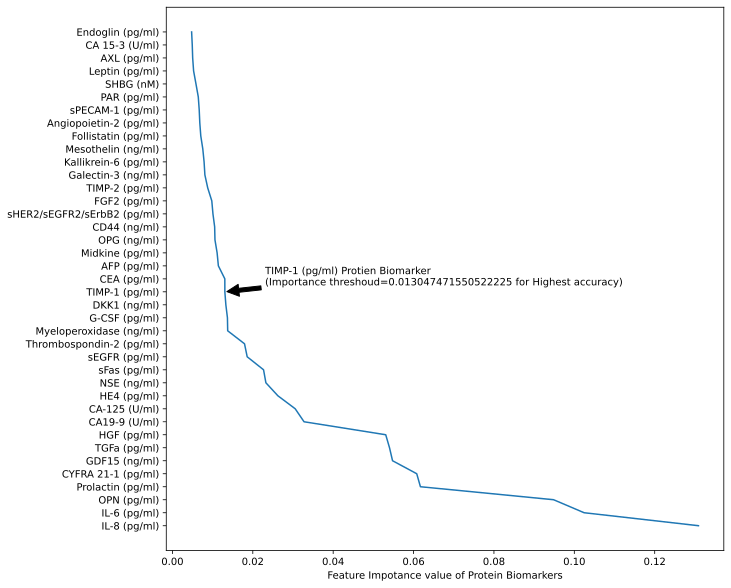

In [0]:
plt.figure(figsize=(10,10))
#plt.hist(n, bins=39)
yv = m[18]
print(yv)
xpos = np.where(m == yv)
print(m)
xv = n[18]
s=str(yv)+" Protien Biomarker \n(Importance threshoud="+str(xv)+' for Highest accuracy)'
plt.plot(n,m)
plt.annotate(s, xy=(xv, 18), xytext=(xv+0.01, 18+0.5),arrowprops=dict(facecolor='black', shrink=0.05),)
plt.xlabel('Feature Impotance value of Protein Biomarkers')
plt.savefig("SD4feature.pdf", bbox_inches='tight')
plt.savefig("SD4feature.png", bbox_inches='tight', dpi=600)
plt.show()

In [0]:
from sklearn.feature_selection import RFE
# Finally selecting the most important features
sfm = SelectFromModel(rfc, threshold=0.025)
sfm.fit(x, y)
#rfc.fit(trx,triy)
# Printing the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(f[feature_list_index])

AFP (pg/ml)
CA-125 (U/ml)
CA 15-3 (U/ml)
CA19-9 (U/ml)
CD44 (ng/ml)
GDF15 (ng/ml)
HGF (pg/ml)
Leptin (pg/ml)
NSE (ng/ml)
sFas (pg/ml)
sHER2/sEGFR2/sErbB2 (pg/ml)
TGFa (pg/ml)
Thrombospondin-2 (pg/ml)
TIMP-2 (pg/ml)


In [0]:
# Importing the required packages
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
 
# Creating a logistic model object
#model = LogisticRegression()
model =RandomForestClassifier()
# Identifying top 2 variables our of 4
for i in range(2,38):
   rfe_model = RFE(model, i)
   rfe_fit = rfe_model.fit(trx, triy)
   p=rfe_model.predict(tx)
   acc=metrics.accuracy_score(p,ty)
   print(i,':')
   print(' =',acc)

In [0]:
model = LogisticRegression()

rfe_model = RFE(model, 25)
rfe_fit = rfe_model.fit(x, y)
p=rfe_model.predict(x)
acc=metrics.accuracy_score(p,y)
# Print the names of the most important features
for feature_list_index in rfe_fit.get_support(indices=True):
    print(f[feature_list_index])
print('accuray=',acc)

AFP (pg/ml)
Angiopoietin-2 (pg/ml)
AXL (pg/ml)
CA-125 (U/ml)
CA 15-3 (U/ml)
CA19-9 (U/ml)
CEA (pg/ml)
CYFRA 21-1 (pg/ml)
Endoglin (pg/ml)
FGF2 (pg/ml)
Follistatin (pg/ml)
G-CSF (pg/ml)
HE4 (pg/ml)
HGF (pg/ml)
IL-8 (pg/ml)
Kallikrein-6 (pg/ml)
Midkine (pg/ml)
PAR (pg/ml)
sEGFR (pg/ml)
sFas (pg/ml)
sHER2/sEGFR2/sErbB2 (pg/ml)
sPECAM-1 (pg/ml)
TGFa (pg/ml)
Thrombospondin-2 (pg/ml)
TIMP-2 (pg/ml)
accuray= 0.5670926517571885


In [0]:
model = RandomForestClassifier()

rfe_model = RFE(model, 13)
rfe_fit = rfe_model.fit(x, y)
p=rfe_model.predict(x)
acc=metrics.accuracy_score(p,y)
# Print the names of the most important features
for feature_list_index in rfe_fit.get_support(indices=True):
    print(f[feature_list_index])
print('accuray=',acc)

AFP (pg/ml)
CA-125 (U/ml)
CA 15-3 (U/ml)
CA19-9 (U/ml)
CD44 (ng/ml)
GDF15 (ng/ml)
HGF (pg/ml)
IL-6 (pg/ml)
Leptin (pg/ml)
sFas (pg/ml)
sHER2/sEGFR2/sErbB2 (pg/ml)
TGFa (pg/ml)
TIMP-2 (pg/ml)
accuray= 1.0


In [0]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x, y)
sfm = SelectFromModel(etc, threshold=0.02)
sfm.fit(x, y)
for feature_list_index in sfm.get_support(indices=True):
    print(f[feature_list_index])

AFP (pg/ml)
AXL (pg/ml)
CA-125 (U/ml)
CA 15-3 (U/ml)
CA19-9 (U/ml)
CD44 (ng/ml)
CYFRA 21-1 (pg/ml)
DKK1 (ng/ml)
Galectin-3 (ng/ml)
GDF15 (ng/ml)
HGF (pg/ml)
IL-6 (pg/ml)
Kallikrein-6 (pg/ml)
Leptin (pg/ml)
Mesothelin (ng/ml)
Midkine (pg/ml)
Myeloperoxidase (ng/ml)
NSE (ng/ml)
OPG (ng/ml)
OPN (pg/ml)
Prolactin (pg/ml)
sEGFR (pg/ml)
sFas (pg/ml)
SHBG (nM)
sHER2/sEGFR2/sErbB2 (pg/ml)
sPECAM-1 (pg/ml)
TGFa (pg/ml)
Thrombospondin-2 (pg/ml)
TIMP-1 (pg/ml)
TIMP-2 (pg/ml)
